In [1]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
stock = (input()).upper()

 aapl


In [3]:
apikey = "api_key"

url = "https://yfapi.net/v6/finance/quote"
url_summary = "https://yfapi.net/v11/finance/quoteSummary/" + stock
url_trending = "https://yfapi.net/v1/finance/trending/US"
url_history = "https://yfapi.net/v8/finance/chart/" + stock

querystring = {"symbols": stock}
querystring_summary = {
    "symbols": stock,
    "modules": "financialData"
}
querystring_trending = {
    "region": "US"
}
querystring_history = {
    "range": "5d",
    "region": "US",
    "interval": "1d",
    "ticker": stock
}

headers = {
    "x-api-key": apikey
}

In [4]:
try:
    response = requests.request("GET", url, headers=headers, params=querystring)
    response_summary = requests.request("GET", url_summary, headers=headers, params=querystring_summary)
    response_trending = requests.request("GET", url_trending, headers=headers, params=querystring_trending)
    response_history = requests.request("GET", url_history, headers=headers, params=querystring_history)
except:
    print("Something went wrong when calling the API.\nThe API may be down or your stock may not be valid.")

In [5]:
try:
    response_json = response.json()
    response_summary_json = response_summary.json()
    response_trending_json = response_trending.json()
    response_history_json = response_history.json()
    
    print("Ticker name:", response_json['quoteResponse']['result'][0]['symbol'])
    print("Full name:", response_json['quoteResponse']['result'][0]['longName'])
    print("Current market price:", response_json['quoteResponse']['result'][0]['regularMarketPrice'])
    print("Target market price:", response_summary_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['raw'])
    print("52 week high:", response_json['quoteResponse']['result'][0]['fiftyTwoWeekHigh'])
    print("52 week low:", response_json['quoteResponse']['result'][0]['fiftyTwoWeekLow'])

    print("\nTop 5 trending stocks:")
    for i in range(5):
        print(response_trending_json['finance']['result'][0]['quotes'][i]['symbol'])

except:
    print("Something went wrong when returning data from the API response.\nYour stock may not be valid.")

Ticker name: AAPL
Full name: Apple Inc.
Current market price: 223.86
Target market price: 240.58
52 week high: 237.23
52 week low: 164.08

Top 5 trending stocks:
EVGO
NVDA
HIMS
META
HKD


In [6]:
df = pd.DataFrame(pd.json_normalize(response_json['quoteResponse']['result'][0]))
df_summary = pd.DataFrame(pd.json_normalize(response_summary_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']))
df_trending = pd.DataFrame(response_trending_json['finance']['result'][0]['quotes']).head(5)

df1 = pd.concat([df, df_summary], axis=1)
df2 = df1.merge(df_trending, on='symbol', how='outer')
df_final = df2[['symbol', 'longName', 'regularMarketPrice', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow', 'raw']]
df_final.rename({'raw': 'targetMeanPrice'})

# Note that AAPL is not the highest trending stock but it wasn't in the
# top 5 so I forced it's inclusion
df_final

,symbol,longName,regularMarketPrice,fiftyTwoWeekHigh,fiftyTwoWeekLow,raw
0,AAPL,Apple Inc.,223.86,237.23,164.08,240.58
1,EVGO,NaN,NaN,NaN,NaN,NaN
2,HIMS,NaN,NaN,NaN,NaN,NaN
3,HKD,NaN,NaN,NaN,NaN,NaN
4,META,NaN,NaN,NaN,NaN,NaN
5,NVDA,NaN,NaN,NaN,NaN,NaN


In [7]:
df_final.to_csv('output.csv')

Text(0, 0.5, 'Daily High')

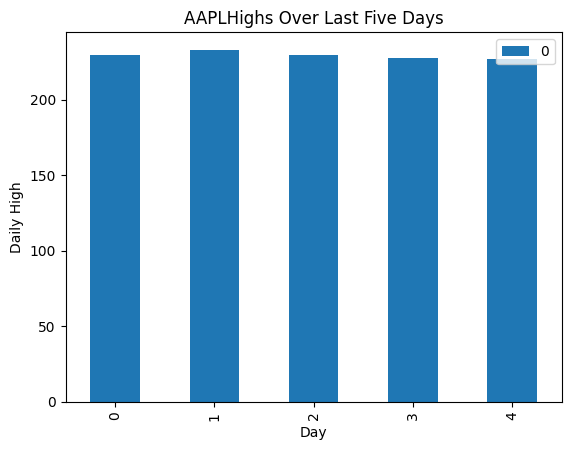

In [8]:
df_history = pd.DataFrame(response_history_json['chart']['result'][0]['indicators']['quote'][0]['high'])
df_history.plot(kind='bar')
plt.title(stock + 'Highs Over Last Five Days')
plt.xlabel('Day')
plt.ylabel('Daily High')